### DATA INGESTION

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#


url = "https://raw.githubusercontent.com/Meritus3266/Data-files/refs/heads/master/Practice_Newdata/home_loan_train.csv"
df = pd.read_csv(url)


In [27]:
#copy of data
df_copy = df.copy()

### PRELIMINARY DATA ANALYSIS

In [17]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [20]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### DATA CLEANING / HANDLING MISSING ERRORS

In [21]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
missing_columns = [x for x in df.columns if df[x].isna().any() == True]
missing_columns_int = [x for x in missing_columns if df[x].dtype in ['int64', 'float64']]
missing_columns_obj = [x for x in missing_columns if x not in missing_columns_int]

print(missing_columns)
print("columns with missing int", missing_columns_int)
print("columns with missing object", missing_columns_obj)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
columns with missing int ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
columns with missing object ['Gender', 'Married', 'Dependents', 'Self_Employed']


In [ ]:
#filling numerical columns with median
from pyparsing import col


for i in missing_columns_int:
    median_value = df[i].median()
    df_copy[i] = df_copy[i].fillna(median_value)

In [ ]:
#filling categorical columns with most frequent value
for col in missing_columns_obj:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)


In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
# checking for duplicates in data
df.duplicated().sum()

np.int64(0)

In [ ]:
#categorical features
obj_columns = [x for x in df.columns if df[x].dtype not in ['int64', 'float64']]
obj_columns.append('Loan_Amount_Term')
obj_columns.append('Credit_History')

for col in obj_columns[1:]:
    print(i)
    print(df[col].value_counts())

Credit_History
Gender
Male      502
Female    112
Name: count, dtype: int64
Credit_History
Married
Yes    401
No     213
Name: count, dtype: int64
Credit_History
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Credit_History
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Credit_History
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Credit_History
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Loan_Status
Y    422
N    192
Name: count, dtype: int64
Credit_History
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: ylabel='LoanAmount'>

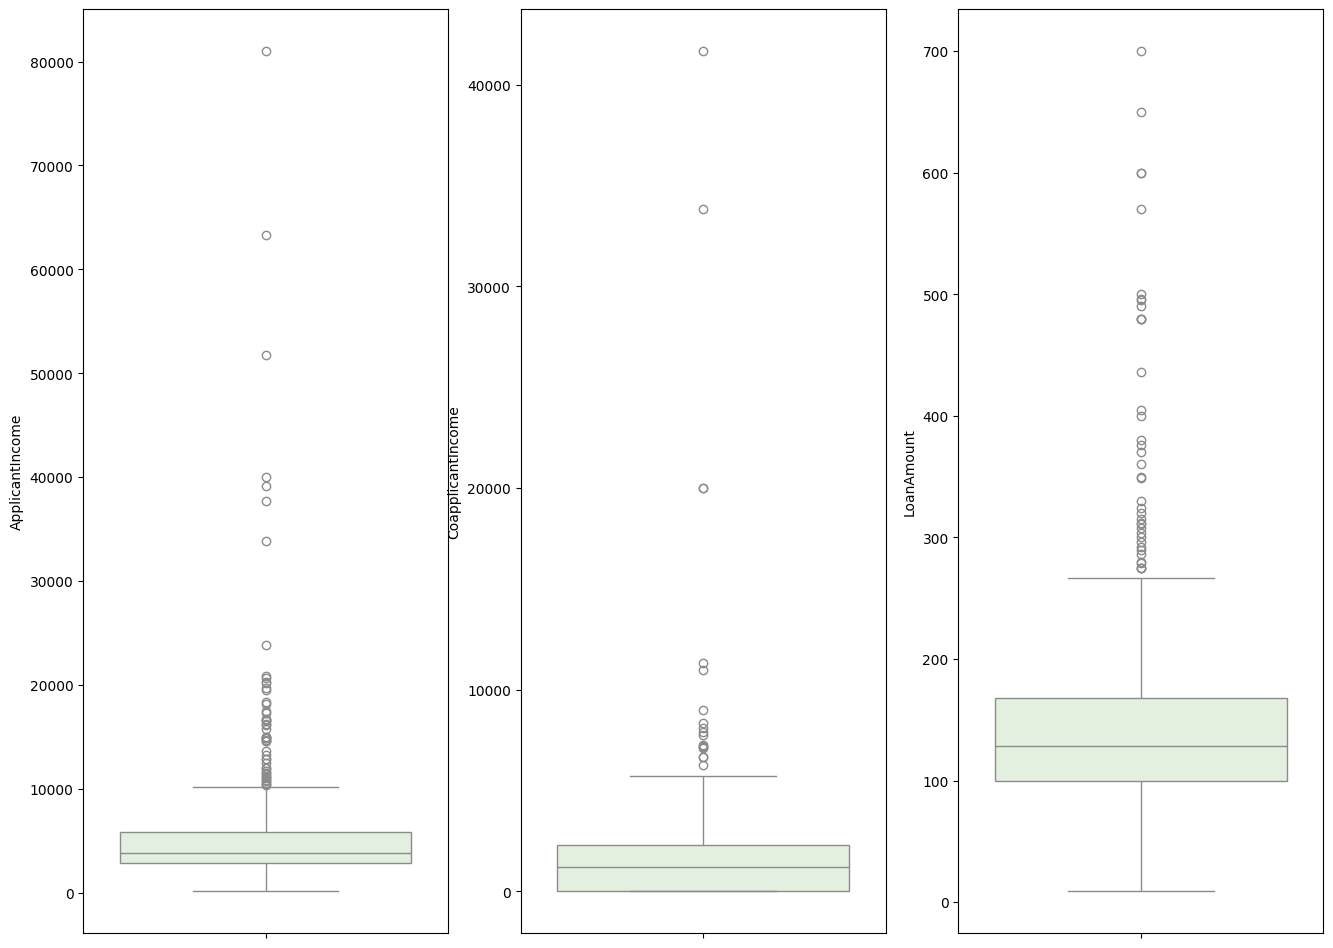

In [39]:
#numerical columns

num_columns = [x for x in df.columns if x not in obj_columns]
sns.set_palette(palette="Greens")
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 12))
sns.boxplot(df[num_columns[0]], ax = ax[0])
sns.boxplot(df[num_columns[1]], ax = ax[1])
sns.boxplot(df[num_columns[2]], ax = ax[2])